<a href="https://colab.research.google.com/github/AnIsAsPe/Condiciones-de-confort-en-ambientes-laborales/blob/master/Confort_en_ambientes_de_trabajo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Condiciones de confort en ambientes laborales

## 0. Cargar Bibliotecas

In [1]:
!pip install -U yellowbrick

     |████████████████████████████████| 266kB 3.5MB/s 
  Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


In [2]:
import pandas as pd
import numpy as np



from sklearn.preprocessing import MinMaxScaler, StandardScaler  #estandarizar varibles
from sklearn.decomposition import PCA   # análisis de componentes principales
from sklearn.cluster import KMeans
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from google.colab import files  #funcion para subir archivo csv a google colab

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px  #para grafias interactivas en 3d




/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Subir archivo de datos

In [3]:
files.upload()

Saving train_input_2yaM34J.csv to train_input_2yaM34J.csv


{'train_input_2yaM34J.csv': b'ID,Date,Temperature,Humidity,Humex,CO2,Bright\r\n0,2017-08-31 23:30:00,22.7,56.0,25.7,534.0,1.0\r\n1,2017-09-01 00:30:00,22.8,55.0,25.7,506.0,1.0\r\n2,2017-09-01 01:30:00,22.9,55.0,25.9,577.0,1.0\r\n3,2017-09-01 02:30:00,23.0,55.0,26.1,630.0,1.0\r\n4,2017-09-01 03:30:00,23.0,55.0,26.1,643.0,1.0\r\n5,2017-09-01 04:30:00,23.0,54.0,25.9,674.0,1.0\r\n6,2017-09-01 05:30:00,23.0,54.0,25.9,672.0,1.0\r\n7,2017-09-01 06:30:00,22.9,54.0,25.7,703.0,1.0\r\n8,2017-09-01 07:30:00,22.9,53.0,25.6,688.0,2.0\r\n9,2017-09-01 08:30:00,22.8,50.0,25.0,566.0,46.0\r\n10,2017-09-01 09:30:00,22.5,46.0,23.9,417.0,429.0\r\n11,2017-09-01 10:30:00,23.1,46.0,24.8,564.0,71.0\r\n12,2017-09-01 11:30:00,23.5,45.0,25.2,528.0,66.0\r\n13,2017-09-01 12:30:00,23.9,45.0,25.8,552.0,7.0\r\n14,2017-09-01 13:30:00,24.0,43.0,25.6,621.0,12.0\r\n15,2017-09-01 14:30:00,24.3,42.0,25.8,572.0,5.0\r\n16,2017-09-01 15:30:00,24.0,37.0,24.6,530.0,137.0\r\n17,2017-09-01 16:30:00,24.3,37.0,25.0,543.0,146.0\r\n18,

## Leer datos y convertirlos a Data Frame

In [4]:
df = pd.read_csv('train_input_2yaM34J.csv',
                    index_col=['ID'], parse_dates=['Date'])
df


Date  Temperature  Humidity  Humex    CO2  Bright
ID                                                                   
0    2017-08-31 23:30:00         22.7      56.0   25.7  534.0     1.0
1    2017-09-01 00:30:00         22.8      55.0   25.7  506.0     1.0
2    2017-09-01 01:30:00         22.9      55.0   25.9  577.0     1.0
3    2017-09-01 02:30:00         23.0      55.0   26.1  630.0     1.0
4    2017-09-01 03:30:00         23.0      55.0   26.1  643.0     1.0
...                  ...          ...       ...    ...    ...     ...
7995 2018-02-18 17:30:00         20.5      26.0   18.4  390.0     5.0
7996 2018-02-18 18:00:00         20.4      26.0   18.3  383.0     2.0
7997 2018-02-18 18:30:00         20.3      26.0   18.2  377.0     1.0
7998 2018-02-18 19:00:00         20.2      26.0   18.0  385.0     1.0
7999 2018-02-18 19:30:00         20.2      26.0   18.0  387.0     1.0

[8000 rows x 6 columns]

# Exploración de datos

In [50]:
datos = df.copy()
datos.drop(['Date'],axis= 1, inplace=True)
datos.head(3)

Temperature  Humidity  Humex    CO2  Bright
ID                                             
0          22.7      56.0   25.7  534.0     1.0
1          22.8      55.0   25.7  506.0     1.0
2          22.9      55.0   25.9  577.0     1.0

In [6]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  8000 non-null   float64
 1   Humidity     8000 non-null   float64
 2   Humex        8000 non-null   float64
 3   CO2          8000 non-null   float64
 4   Bright       8000 non-null   float64
dtypes: float64(5)
memory usage: 375.0 KB


## ¿Existen casos faltantes?




En caso afirmativo:
1. Remover renglones con valores faltantes

  `dropna()`
2. Imputar valores faltante con el promedio, la mediana o la moda de la columna.

  `fillna(df.columna.mean()`
3. Valor estimado mediante otro modelo de aprendizaje de máquina.

In [7]:
datos.isna().sum()

Temperature    0
Humidity       0
Humex          0
CO2            0
Bright         0
dtype: int64

## Distribución y correlación entre variables

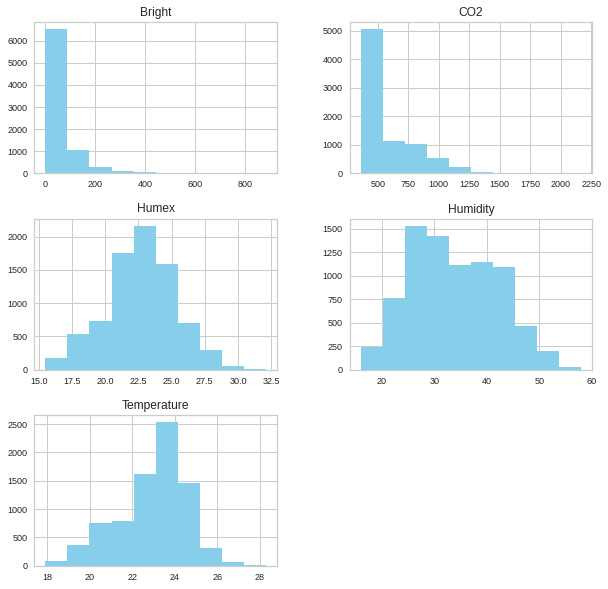

In [8]:
datos.hist(figsize = (10,10), xlabelsize=9, ylabelsize=9,
                               color='skyblue')
plt.show()

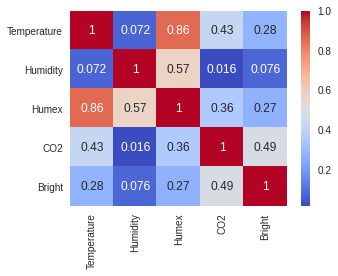

In [9]:
def correlacion(dataframe, grafica = True):
    corr=dataframe.corr()                #creamos la matriz de correlación
    fig = plt.figure(figsize = (5, 4))
    if grafica == True:
        sns.heatmap(corr, cmap="coolwarm", annot=True, square=False)
        fig.tight_layout()
    return corr
correlaciones = correlacion(datos)

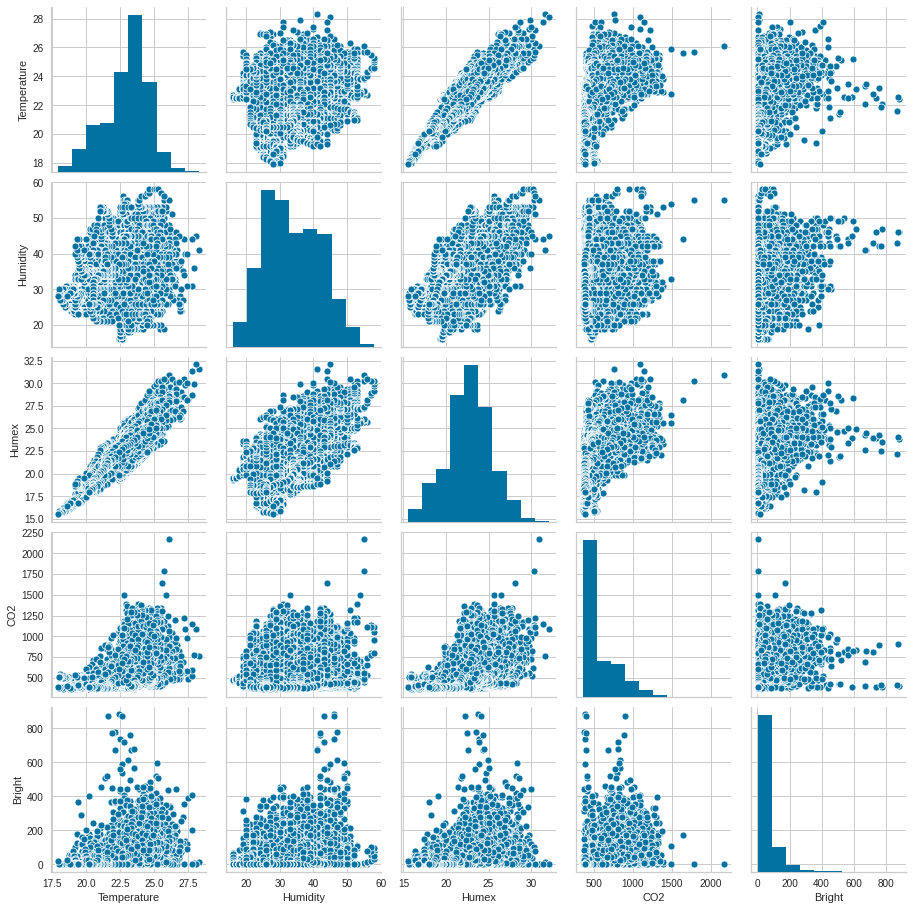

In [10]:
g = sns.pairplot(datos, palette ='Dark2')

plt.show()

## Unificar escalas de medición de cada variable

In [51]:
datos_escalados = datos.copy()
columnas = datos.columns

escala = MinMaxScaler()


datos_escalados[columnas] = escala.fit_transform(datos[columnas])
datos_escalados


Temperature  Humidity     Humex       CO2    Bright
ID                                                       
0        0.461538  0.952381  0.614458  0.095739  0.000000
1        0.471154  0.928571  0.614458  0.080243  0.000000
2        0.480769  0.928571  0.626506  0.119535  0.000000
3        0.490385  0.928571  0.638554  0.148866  0.000000
4        0.490385  0.928571  0.638554  0.156060  0.000000
...           ...       ...       ...       ...       ...
7995     0.250000  0.238095  0.174699  0.016049  0.004540
7996     0.240385  0.238095  0.168675  0.012175  0.001135
7997     0.230769  0.238095  0.162651  0.008854  0.000000
7998     0.221154  0.238095  0.150602  0.013282  0.000000
7999     0.221154  0.238095  0.150602  0.014388  0.000000

[8000 rows x 5 columns]

# Análisis de Componentes Principales


- Cada punto es considerado como un objeto físico en el espacio de n dimensiones, de manera que cada dimensión es un punto de vista.
- Varianza como medida de variabilidad
- Si los datos tienen alta covarianza, cuando se representan en n dimensiones, buscamos reemplazar esas dimensiones por una combinación lineal.
- El análisis de componentes principales encuentra un nuevo conjunto de dimensiones ortogonales (independientes) ordenadas de acuerdo a la varianza de los datos a lo largo de estas

Referencia: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html


In [60]:
pca = PCA()
componentes = pca.fit_transform(datos_escalados) #devuelve np array
num_componentes = datos_escalados.shape[1]
nombres_col = ['componente'+str(i+1) for i in range(num_componentes)]
componentes = pd.DataFrame(data = componentes, columns = nombres_col)
componentes

componente1  componente2  componente3  componente4  componente5
0        0.405971     0.387037    -0.014875    -0.040003    -0.007500
1        0.393608     0.368407    -0.032314    -0.030314    -0.006268
2        0.412526     0.349564    -0.007412    -0.051269    -0.003219
3        0.429686     0.333582     0.009855    -0.066777    -0.000167
4        0.430955     0.331516     0.015368    -0.070712    -0.000169
...           ...          ...          ...          ...          ...
7995    -0.403533     0.077857    -0.006081     0.019222     0.007892
7996    -0.412829     0.085927    -0.006798     0.018062     0.009287
7997    -0.421778     0.093548    -0.005905     0.018497     0.010675
7998    -0.432982     0.099836     0.002699     0.015543     0.007611
7999    -0.432787     0.099518     0.003547     0.014938     0.007611

[8000 rows x 5 columns]

In [63]:
#Varianza explicada por componente
var_exp = pca.explained_variance_ratio_
var_exp

array([5.47597345e-01, 3.02439958e-01, 1.06122713e-01, 4.35357994e-02,
       3.04184807e-04])

In [66]:
#Varianza acumulada
var_acumulada = np.cumsum(var_exp)
var_acumulada

array([0.54759734, 0.8500373 , 0.95616002, 0.99969582, 1.        ])

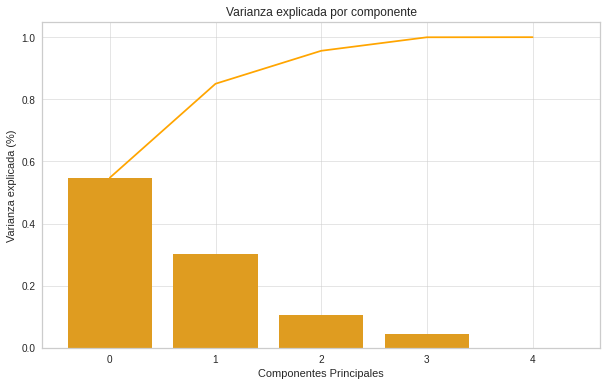

In [67]:
# Grafica de la varianza explicada por componente

ind = list(range(num_componentes))

plt.figure(figsize=(10,6))

ax = sns.barplot(ind, var_exp, color='orange', ci=None)
ax2 = sns.lineplot(ind, var_acumulada, color='orange', ci=None)
ax.grid(b=True, which='major', linewidth=0.5)

ax.set_xlabel("Componentes Principales")
ax.set_ylabel("Varianza explicada (%)")
plt.title('Varianza explicada por componente');


In [15]:
var_acumulada

array([0.54759734, 0.8500373 , 0.95616002, 0.99969582, 1.        ])

In [16]:
componentes = componentes[componentes.columns[0:3]]
componentes

componente1  componente2  componente3
0        0.405971     0.387037    -0.014875
1        0.393608     0.368407    -0.032314
2        0.412526     0.349564    -0.007412
3        0.429686     0.333582     0.009855
4        0.430955     0.331516     0.015368
...           ...          ...          ...
7995    -0.403533     0.077857    -0.006081
7996    -0.412829     0.085927    -0.006798
7997    -0.421778     0.093548    -0.005905
7998    -0.432982     0.099836     0.002699
7999    -0.432787     0.099518     0.003547

[8000 rows x 3 columns]

### Visualización de las mediciones en los tres componentes principales

In [70]:
datos_escalados.insert(0, 'componente1', componentes['componente1'])
datos_escalados.insert(1, 'componente2', componentes['componente2'])
datos_escalados.insert(2, 'componente3', componentes['componente3'])
datos_escalados.head()

componente1  componente2  componente3  ...     Humex       CO2  Bright
ID                                         ...                            
0      0.405971     0.387037    -0.014875  ...  0.614458  0.095739     0.0
1      0.393608     0.368407    -0.032314  ...  0.614458  0.080243     0.0
2      0.412526     0.349564    -0.007412  ...  0.626506  0.119535     0.0
3      0.429686     0.333582     0.009855  ...  0.638554  0.148866     0.0
4      0.430955     0.331516     0.015368  ...  0.638554  0.156060     0.0

[5 rows x 8 columns]

In [134]:
medicion = 'Bright'

fig = px.scatter_3d(
    datos_escalados,
    x = 'componente1', y = 'componente2', z = 'componente3',
    color = medicion,
    title = medicion)

fig.update_traces(marker = dict(size = 3, 
                              line=dict(width = 0.1, color = 'DarkslateGrey')),
                  selector=dict(mode = 'markers'))
fig.show()

#### Actividad:
- Probar cada una de las mediciones en la celda anterior y analizar la gráfica de los datos con los 3 componentes principales.


# Selección del número de clústers 

### Elbow Method

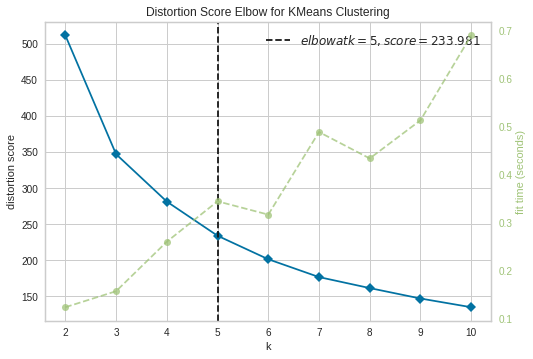

In [17]:

codo = KElbowVisualizer(KMeans(random_state=3))
codo.fit(componentes)
codo.poof()

### Coeficiente de Silhouette

El coeficiente de Silhouette evalúa la cercania entre puntos de un mismo cluster al mismo tiempo que la distancia a los clusters vecinos.
 
El coeficiente de Silhouette oscila entre -1 y 1 donde 1 indica un clúster de alta densidad y -1 que no existe densidad alguna.

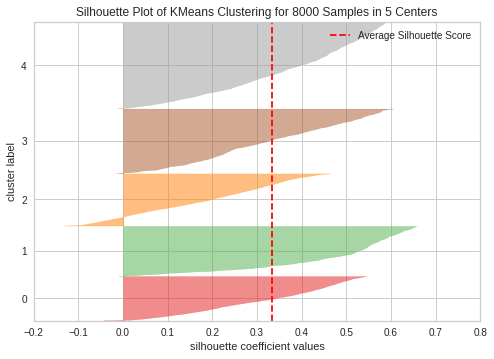

In [18]:
model = KMeans(5)
graf_sil = SilhouetteVisualizer(model)
graf_sil.fit(componentes)
graf_sil.poof()

# K means

In [122]:
model = KMeans(n_clusters = 5, random_state=37).fit(componentes)
clusters = model.predict(componentes)

In [123]:
datos_escalados.insert(0, 'cluster', clusters+1)
datos_escalados.cluster = datos_escalados.cluster.astype(str)


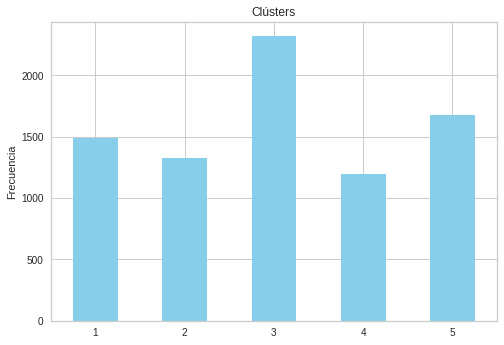

In [124]:
g = datos_escalados.cluster.value_counts().sort_index().plot(kind='bar', 
                                                rot=0, 
                                                color='skyblue',
                                                )
g.set(ylabel = 'Frecuencia', title = 'Clústers')
plt.show()

In [135]:
import plotly.express as px

fig = px.scatter_3d(datos_escalados, 
                    x = 'componente1', 
                    y = 'componente2', 
                    z='componente3', 
                    color='cluster',
                    title="Condiciones ambientales en el entorno laboral")

fig.update_traces(marker = dict(size = 3, 
                                line=dict(width = 0.1, color = 'DarkslateGrey')),
                  selector = dict(mode='markers'))

fig.show()

In [136]:
datos.insert(0, 'cluster', clusters+1)
datos.insert(1, 'componente1', componentes['componente1'])
datos.insert(2, 'componente2', componentes['componente2'])
datos.insert(3, 'componente3', componentes['componente3'])


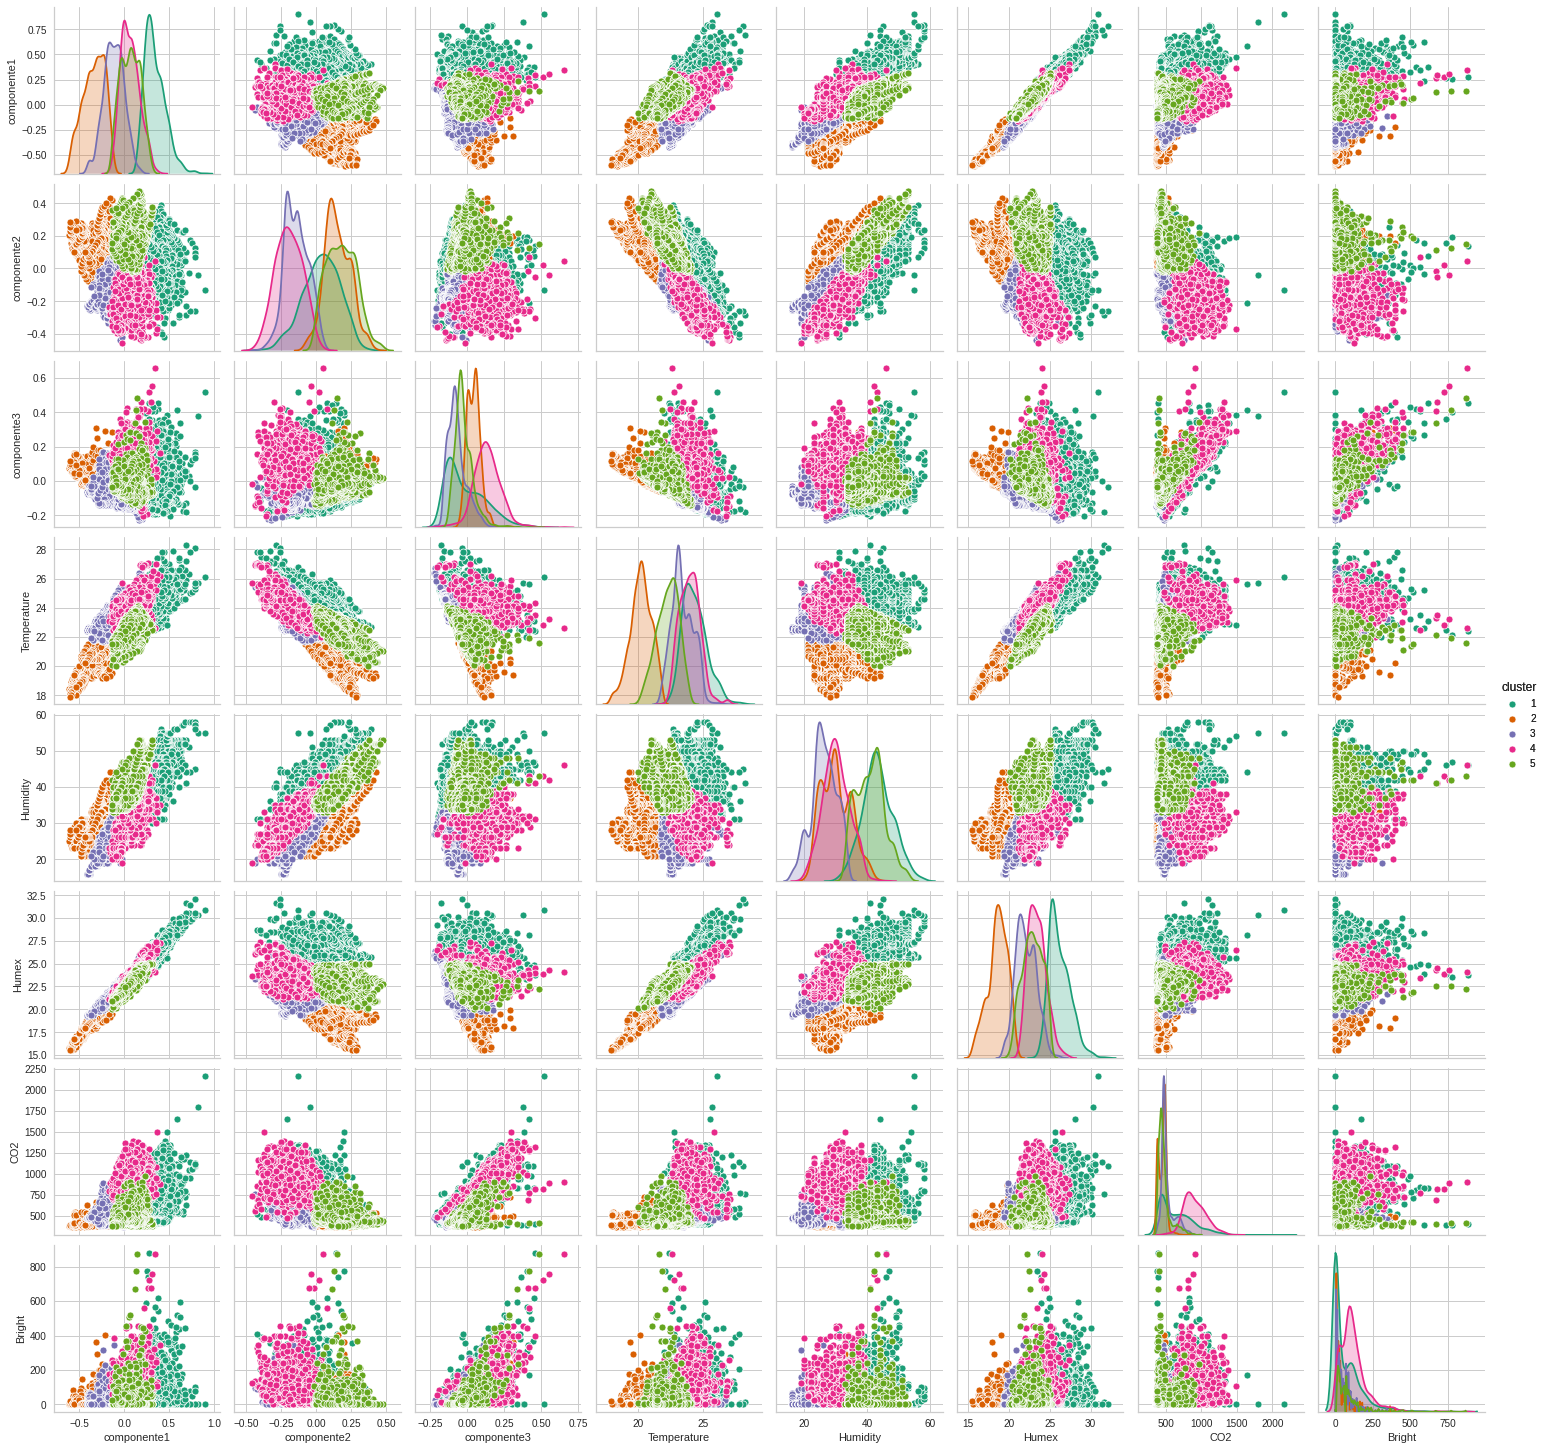

In [137]:
sns.set_palette('Dark2')
g = sns.pairplot(datos, hue = 'cluster')
g.add_legend()
plt.show()